# Measures of Relation for Grocery Orders

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

In [5]:
df=pd.read_csv("grocery orders.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               20 non-null     int64  
 1   order_date             20 non-null     object 
 2   city                   20 non-null     object 
 3   region                 20 non-null     object 
 4   customer_age           20 non-null     int64  
 5   gender                 20 non-null     object 
 6   membership_tier        20 non-null     object 
 7   income_bracket         20 non-null     object 
 8   device_type            20 non-null     object 
 9   payment_method         20 non-null     object 
 10  items_count            20 non-null     int64  
 11  basket_value_usd       20 non-null     float64
 12  coupon_discount_pct    20 non-null     int64  
 13  delivery_distance_km   20 non-null     float64
 14  delivery_time_min      20 non-null     float64
 15  on_time 

In [6]:
df_filled=df.copy()
df_filled["promo_type"]=df_filled["promo_type"].fillna("N/A") ## Handling the mission values.
df_filled.head()

,order_id,order_date,city,region,customer_age,gender,membership_tier,income_bracket,device_type,payment_method,...,coupon_discount_pct,delivery_distance_km,delivery_time_min,on_time,rider_rating,customer_satisfaction,ambient_temp_c,tip_amount_usd,category_mix,promo_type
0,1001,2025-08-05,Bengaluru,South,45,Female,Bronze,Mid,Android,UPI,...,0,3.51,41.5,Yes,3.7,4,30.9,1.05,Mixed,N/A
1,1002,2025-08-25,Ahmedabad,West,31,Male,Silver,Mid,Android,COD,...,0,5.34,47.1,No,4.2,4,35.6,0.00,Pantry,N/A
2,1003,2025-07-13,Chennai,South,28,Male,Silver,Low,Android,Card,...,0,8.11,63.3,No,4.8,4,21.8,0.92,Mixed,N/A
3,1004,2025-07-12,Hyderabad,South,47,Male,Silver,High,Android,UPI,...,25,3.71,49.5,No,3.8,4,33.3,0.16,Mixed,BOGO
4,1005,2025-08-06,Mumbai,West,20,Other,Silver,Low,Android,UPI,...,0,9.36,85.5,No,4.9,5,27.1,0.27,Mixed,N/A


## Task 1
Compute the Coefficient of Variation (CV) for basket_value_usd and items_count across:


city


membership_tier

Identify the top 3 most volatile segments (highest CV) for each metric and give a one-line business interpretation for each.

In [7]:
## Coefficient of Variation (CV) for basket_value_usd and items_count across:
bronze_member=df_filled["membership_tier"]=="Bronze"
silver_member=df_filled["membership_tier"]=="Silver"
platinum_member=df_filled["membership_tier"]=="Platinum"
gold_member=df_filled["membership_tier"]=="Gold"

br_t=df_filled.loc[bronze_member,["membership_tier","basket_value_usd","items_count"]]
sr_t=df_filled.loc[silver_member,["membership_tier","basket_value_usd","items_count"]]
pl_t=df_filled.loc[platinum_member,["membership_tier","basket_value_usd","items_count"]]
g_t=df_filled.loc[gold_member,["membership_tier","basket_value_usd","items_count"]]

print(f"{br_t["basket_value_usd"].std()/br_t["basket_value_usd"].mean()*100:.2f}%")
print(f"{sr_t["basket_value_usd"].std()/sr_t["basket_value_usd"].mean()*100:.2f}%")
print(f"{pl_t["basket_value_usd"].std()/pl_t["basket_value_usd"].mean()*100:.2f}%")
print(f"{g_t["basket_value_usd"].std()/g_t["basket_value_usd"].mean()*100:.2f}%")

## Most Volatile of basket value by membership is:
#a) Platinum
#b) Silver
#c) Bronze


35.66%
39.95%
77.00%
9.09%


In [8]:
print(f"{br_t["items_count"].std()/br_t["items_count"].mean()*100:.2f}%")
print(f"{sr_t["items_count"].std()/sr_t["items_count"].mean()*100:.2f}%")
print(f"{pl_t["items_count"].std()/pl_t["items_count"].mean()*100:.2f}%")
print(f"{g_t["items_count"].std()/g_t["items_count"].mean()*100:.2f}%")

## Most Volatile of item_count by membership:
## a)Silver
## b)Bronze
## c) Platinum

35.18%
54.34%
32.64%
24.96%


In [9]:
beng_city=df_filled["city"]=="Bengaluru"
ahmedabad_city=df_filled["city"]=="Ahmedabad"
chennai_city=df_filled["city"]=="Chennai"
hyderabad_city=df_filled["city"]=="Hyderabad"
mumbai_city=df_filled["city"]=="Mumbai"
kolkata_city=df_filled["city"]=="Kolkata"
pune_city=df_filled["city"]=="Pune"
delhi_city=df_filled["city"]=="Delhi"

b_t=df_filled.loc[beng_city,["city","basket_value_usd","items_count"]]
a_t=df_filled.loc[ahmedabad_city,["city","basket_value_usd","items_count"]]
c_t=df_filled.loc[chennai_city,["city","basket_value_usd","items_count"]]
h_t=df_filled.loc[hyderabad_city,["city","basket_value_usd","items_count"]]
m_t=df_filled.loc[mumbai_city,["city","basket_value_usd","items_count"]]
k_t=df_filled.loc[kolkata_city,["city","basket_value_usd","items_count"]]
p_t=df_filled.loc[pune_city,["city","basket_value_usd","items_count"]]
d_t=df_filled.loc[delhi_city,["city","basket_value_usd","items_count"]]

print(f"{b_t["basket_value_usd"].std()/b_t["basket_value_usd"].mean()*100:.2f}%")
print(f"{a_t["basket_value_usd"].std()/a_t["basket_value_usd"].mean()*100:.2f}%")
print(f"{c_t["basket_value_usd"].std()/c_t["basket_value_usd"].mean()*100:.2f}%")
print(f"{h_t["basket_value_usd"].std()/h_t["basket_value_usd"].mean()*100:.2f}%")
print(f"{m_t["basket_value_usd"].std()/m_t["basket_value_usd"].mean()*100:.2f}%")
print(f"{k_t["basket_value_usd"].std()/k_t["basket_value_usd"].mean()*100:.2f}%")
print(f"{p_t["basket_value_usd"].std()/p_t["basket_value_usd"].mean()*100:.2f}%")
print(f"{d_t["basket_value_usd"].std()/d_t["basket_value_usd"].mean()*100:.2f}%")

## Most volatile basket value by city:
# a) Mumbai
# b) Bengaluru
# c) Chennai

60.87%
4.30%
43.69%
24.38%
63.99%
nan%
nan%
13.00%


In [10]:
print(f"{b_t["items_count"].std()/b_t["items_count"].mean()*100:.2f}%")
print(f"{a_t["items_count"].std()/a_t["items_count"].mean()*100:.2f}%")
print(f"{c_t["items_count"].std()/c_t["items_count"].mean()*100:.2f}%")
print(f"{h_t["items_count"].std()/h_t["items_count"].mean()*100:.2f}%")
print(f"{m_t["items_count"].std()/m_t["items_count"].mean()*100:.2f}%")
print(f"{k_t["items_count"].std()/k_t["items_count"].mean()*100:.2f}%")
print(f"{p_t["items_count"].std()/p_t["items_count"].mean()*100:.2f}%")
print(f"{d_t["items_count"].std()/d_t["items_count"].mean()*100:.2f}%")

## Most Volatile Items_Count by city:
# a) Chennai
# b) Delhi
# c) Mumbai

15.71%
20.20%
60.61%
16.67%
40.70%
nan%
nan%
56.40%


## Task 2
"""The Growth team suspects higher coupon discounts might lift basket value differently across promotions.
Ask:
For orders where coupon_discount_pct > 0, compute covariance and Pearson correlation between coupon_discount_pct and basket_value_usd by promo_type.
Rank promo_type by the strength (absolute value) of correlation.
Give a recommendation: which promo type seems to pay for itself?"""


In [11]:
corrs=df_filled[df_filled["coupon_discount_pct"]>0]
t=corrs.groupby("promo_type")[["coupon_discount_pct","basket_value_usd"]].corr()
t
## The correlation of basket value and coupon shows a strong negative relation in BOGO promo type.

coupon_discount_pct  basket_value_usd
promo_type                                                           
BOGO       coupon_discount_pct             1.000000         -0.897587
           basket_value_usd               -0.897587          1.000000
Flat50     coupon_discount_pct                  NaN               NaN
           basket_value_usd                     NaN          1.000000

In [12]:
extract=t.iloc[0::2,-1].reset_index()
ren_t=extract.rename(columns={"basket_value_usd":"corr"})
ren_t["Flag"]=ren_t["corr"].apply(lambda x: "negative" if x < 0 else "weak" if abs(x) < 0.2 else "moderate") 
ren_t 

## The promo - BOGO seems to pay for itself due to its strong negative correlation of about -0.9.

,promo_type,level_1,corr,Flag
0,BOGO,coupon_discount_pct,-0.897587,negative
1,Flat50,coupon_discount_pct,NaN,moderate


## Task 3 
The Operations head wants proof that longer distance leads to longer delivery time, and whether this relationship is consistent across cities.
Ask:
Compute overall covariance and correlation between delivery_distance_km and delivery_time_min.

Repeat by city; flag any cities with weak (|corr| < 0.2) or negative correlations.

Also calculate the CV of delivery_time_min by city to highlight unstable ops.


In [13]:
print(df_filled[["delivery_distance_km","delivery_time_min"]].corr())
print(df_filled[["delivery_distance_km","delivery_time_min"]].cov())

## There is a stong positive relation between delivery distance and delivery time.

                      delivery_distance_km  delivery_time_min
delivery_distance_km              1.000000           0.949049
delivery_time_min                 0.949049           1.000000
                      delivery_distance_km  delivery_time_min
delivery_distance_km             11.921727          88.046005
delivery_time_min                88.046005         721.943447


In [14]:
city_corr=df_filled.groupby("city")[["delivery_distance_km","delivery_time_min"]].corr()
city_corr
## For Hyderabad, Bengaluru, Chennai the relation between delivery distance and delivery time is negative.

delivery_distance_km  delivery_time_min
city                                                                   
Ahmedabad delivery_distance_km              1.000000           1.000000
          delivery_time_min                 1.000000           1.000000
Bengaluru delivery_distance_km              1.000000          -1.000000
          delivery_time_min                -1.000000           1.000000
Chennai   delivery_distance_km              1.000000          -1.000000
          delivery_time_min                -1.000000           1.000000
Delhi     delivery_distance_km              1.000000           0.976825
          delivery_time_min                 0.976825           1.000000
Hyderabad delivery_distance_km              1.000000          -0.072611
          delivery_time_min                -0.072611           1.000000
Kolkata   delivery_distance_km                   NaN                NaN
          delivery_time_min                      NaN                NaN
Mumbai    delivery_distance_km              1.000000           0.995499
          delivery_time_min                 0.995499           1.000000
Pune      delivery_distance_km                   NaN                NaN
          delivery_time_min                      NaN                NaN

In [22]:
cV_city=(df_filled.groupby("city")["delivery_time_min"].agg(
    ["mean","std"]).assign(CV=lambda x: round(x["std"]/x["mean"]*100,2)).reset_index())


## Higlighting unstable ops
cV_city["Unstable ops"]=cV_city["CV"].apply(
    lambda x: "Unstable" if x > 30 else "Stable")
cV_city

,city,mean,std,CV,Unstable ops
0,Ahmedabad,55.450,11.808683,21.30,Stable
1,Bengaluru,48.750,10.253048,21.03,Stable
2,Chennai,68.150,6.858936,10.06,Stable
3,Delhi,67.880,41.403708,61.00,Unstable
4,Hyderabad,44.100,4.703190,10.66,Stable
5,Kolkata,101.800,NaN,NaN,Stable
6,Mumbai,57.825,30.029694,51.93,Unstable
7,Pune,36.200,NaN,NaN,Stable


In [20]:
corr_city=(df_filled.groupby("city")[["delivery_distance_km", "delivery_time_min"]].corr().iloc[0::2,-1].reset_index().rename(
    columns={"delivery_time_min":"corr"})[["city","corr"]])

def flag(a):
    if abs(a) < 0.2:
        return "weak"
    elif a < 0:
        return "negative"
    else:
        return "Strong"
corr_city["Flag"]=corr_city["corr"].apply(flag)
corr_city


,city,corr,Flag
0,Ahmedabad,1.000000,Strong
1,Bengaluru,-1.000000,negative
2,Chennai,-1.000000,negative
3,Delhi,0.976825,Strong
4,Hyderabad,-0.072611,weak
5,Kolkata,NaN,Strong
6,Mumbai,0.995499,Strong
7,Pune,NaN,Strong


## Task 4 
CX believes better rider ratings lead to higher tips and better customer satisfaction. Validate it.
Ask:
Build a small correlation matrix for rider_rating, tip_amount_usd, customer_satisfaction.


Compare the correlation between rider_rating and tip_amount_usd for on_time == 'Yes' vs on_time == 'No'.


Compute the CV of tips by payment_method and recommend one uptick idea like nudge, UI change.


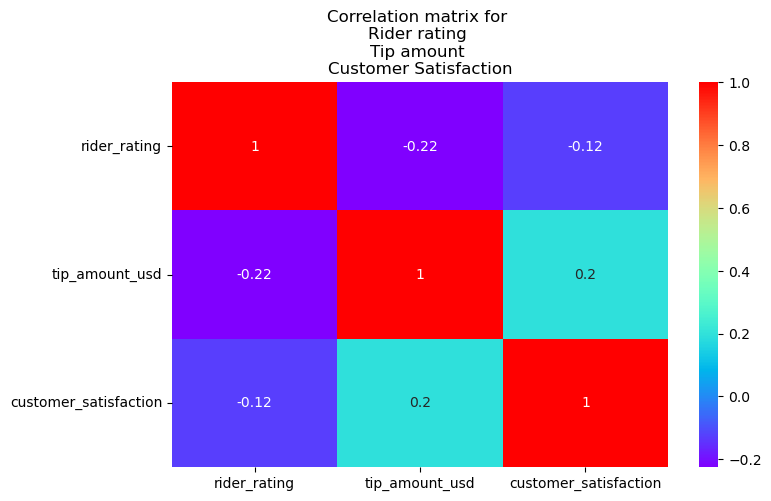

In [58]:
plt.figure(figsize=(8,5))
sns.heatmap(df[["rider_rating","tip_amount_usd","customer_satisfaction"]].corr(),cmap="rainbow",annot=True)
plt.xticks(rotation=0)
plt.title("Correlation matrix for \nRider rating \nTip amount \nCustomer Satisfaction")
plt.show()

In [23]:
df_filled.groupby("on_time")[["rider_rating","tip_amount_usd"]].corr()

rider_rating  tip_amount_usd
on_time                                             
No      rider_rating        1.000000       -0.198290
        tip_amount_usd     -0.198290        1.000000
Yes     rider_rating        1.000000       -0.046626
        tip_amount_usd     -0.046626        1.000000

In [74]:
cv_tips=(df_filled.groupby("payment_method")["tip_amount_usd"].agg(["mean","std"]).assign(
    CV=lambda x: round(x["std"]/x["mean"]*100,2)).reset_index())
cv_tips

## Uptick idea could be: -
# a) Add tip to Delivery Partner to get 10% off upto Rs 50 on next order.

,payment_method,mean,std,CV
0,COD,0.106667,0.127070,119.13
1,Card,0.541667,0.410337,75.75
2,UPI,0.451250,0.433011,95.96


## Task 5 
Product wants to know if cart size drives spend differently by device and payment method to prioritize checkout experiments.
Ask:
For each device_type, compute covariance and correlation between items_count and basket_value_usd.

Repeat for each payment_method.

Where is the relationship strongest? 

In [92]:
df_filled.groupby("device_type")[["items_count","basket_value_usd"]].corr() ## correlation by device type
## Strongest is in "Android" device type

items_count  basket_value_usd
device_type                                                
Android     items_count          1.000000          0.263316
            basket_value_usd     0.263316          1.000000
Web         items_count               NaN               NaN
            basket_value_usd          NaN               NaN
iOS         items_count          1.000000         -0.070636
            basket_value_usd    -0.070636          1.000000

In [82]:
df_filled.groupby("device_type")[["items_count","basket_value_usd"]].cov() ## Covariance by device type

C:\Users\rajay\anaconda3\Lib\site-packages\pandas\core\frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\rajay\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\rajay\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


items_count  basket_value_usd
device_type                                                
Android     items_count          5.089744         12.161154
            basket_value_usd    12.161154        419.080891
Web         items_count               NaN               NaN
            basket_value_usd          NaN               NaN
iOS         items_count          5.600000         -1.240000
            basket_value_usd    -1.240000         55.030240

In [86]:
df_filled.groupby("payment_method")[["items_count","basket_value_usd"]].cov() ## Covariance by payment method

items_count  basket_value_usd
payment_method                                                
COD            items_count          2.300000         10.660000
               basket_value_usd    10.660000        735.059307
Card           items_count         11.066667         23.134000
               basket_value_usd    23.134000        105.285710
UPI            items_count          5.839286        -12.399643
               basket_value_usd   -12.399643        142.980307

In [85]:
df_filled.groupby("payment_method")[["items_count","basket_value_usd"]].corr()  ## Correlation by payment method

## Here the strongest is in "Card" Method

items_count  basket_value_usd
payment_method                                                
COD            items_count          1.000000          0.259258
               basket_value_usd     0.259258          1.000000
Card           items_count          1.000000          0.677731
               basket_value_usd     0.677731          1.000000
UPI            items_count          1.000000         -0.429132
               basket_value_usd    -0.429132          1.000000

## Task 6 
Story: You need a crisp one-pager that leadership can skim in 60 seconds.
Ask:
Create a function that, given a list of metrics and a segment column, returns a CV scorecard.


Create a function that, given a list of metric pairs and a segment column, returns covariance & correlation per segment.


Produce a final Top-5 Insights list (plain English, one line each), referencing your earlier tasks.


In [118]:
def cv_fun(x,y):
    return (df_filled.groupby(x)[y].agg(["mean","std"]).assign(CV=lambda z: round(z["std"]/z["mean"]*100,2)).reset_index())
cv_fun("payment_method","items_count")

,payment_method,mean,std,CV
0,COD,7.500000,1.516575,20.22
1,Card,5.666667,3.326660,58.71
2,UPI,5.875000,2.416461,41.13


In [131]:
def cov_fun(x,y,z):
    print("1- for covariance \n2- for correlation")
    typ=int(input("Enter the requirement"))

    if typ==1:
        return (df_filled.groupby(x)[[y,z]].cov().iloc[0::2,-1].reset_index().rename(
    columns={z:"cov"})[[x,"cov"]])
    elif typ==2:
        return (df_filled.groupby(x)[[y,z]].corr().iloc[0::2,-1].reset_index().rename(
    columns={z:"corr"})[[x,"corr"]])
    else:
        print("Please input the correct type")

cov_fun("region","rider_rating","customer_satisfaction")

1- for covariance 
2- for correlation


Enter the requirement 2


,region,corr
0,East,NaN
1,North,-0.131260
2,South,-0.561249
3,West,0.260970


## Top 5 insights after analysis: -
1. For IOS the items_count and basket value shows a negative correlation.
2. Customer satisfaction and tip amount shows a weak positive correlation.
3. In delhi the delivery has the most unstable operations.
4. BOGO promo type is best suiting for discounts.
5. Mumbai has the most volatile basket value.